In [1]:
# Adrian Marinovich
# Springboard - Data Science Career Track
# Inferential Statistics Exercise 3
# October 3, 2018

# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [56]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import string

import scipy

from sklearn.svm import LinearSVC 
from sklearn.svm import SVC 

from sklearn.datasets import fetch_mldata
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from scipy.stats import pearsonr

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

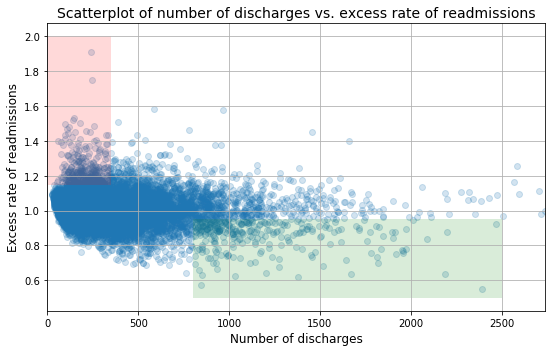

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

In [5]:
# Check data
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [6]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


Note that the first 81 (sorted) hospitals have missing data for the readmission variables, and the last 3 hospitals have very large discharge outliers that make plotting difficult, so we will exclude those from further analysis.

In [5]:
clean_82 = clean_hospital_read_df[81:-3]

A. Do you agree with the above analysis and recommendations? Why or why not?

The above analysis appears to be flawed in general, both because it relies on a correlation that is not clearly obvious in the plot, and because it makes an apples-to-oranges comparison between hospitals, in putting all hospitals of all sizes together without differentiation, as seen by the single 'blob' spread out over the above plot.

Below, to try to differentiate hospitals, the discharge number is normalized by dividing it by the readmission number. This ratio (D/R) is then plotted against the excess readmission ratio (ERR) to reveal two distinct groups (or 'blobs') of hospitals (see Figure 1, below). 

Perhaps the differentiation seen in Figure 1 is the result of hospitals with high D/R (right 'blob') seeing low-comorbidity patients, possibly including those with many patients using short-stay surgical and/or maternity centers within the hospital, splitting off into a separate group from those hospitals with low D/R (left 'blob') handling more complex high-comorbidity patients. 

Whatever the underlying explanation, Figure 1 appears to convey more useful information than the plot in the above analysis. Aside from splitting the hospitals into two groups, the groups show interesting features not previously appreciable in the above plot. First, both groups show unmistakable _local_ trends towards lower ERR (better performance) with higher D/R, which stands in contrast to the less obvious ERR trend with discharge number seen above. Furthermore, the right group with _overall_ higher D/R shows the _overall_ greatest spread of ERR, and in fact shows most of the _overall_ worst-performing hospitals. This indicates this particular group may be most worthy of special consideration in efforts to improve performance.

In addition, the above analysis sets an ERR of 1 as the analytical threshold, even though the overall mean ERR is 1.01. To better understand poor ERR performance (i.e., high ERR), it is more informative both to set a higher ERR threshold, and to include a measure of distance above this theshold, since the 'worst of the worst' performing hospitals may have disproportionate impacts on patient outcomes and healthcare costs. To ensure we select a tail of poor performers from both D/R groups, we set 1.2 as the new ERR threshold, and create a measure of poor performance using the amount, if any, that ERR exceeds 1.2 (max(0, ERR-1.2)). 

Finally, there are also two specific critiques to be made of the above analysis. First, they state that there is a 'significant correlation between hospital capacity (number of discharges) and readmission rates' without specifying the statistical significance test used to support this conclusion. As noted above, while the Pearson correlation coefficient is significant, it shows only a slight negative linear correlation (the coefficient is only -0.093, where -1 would be an exact linear relationship). Second, while in their statistics section they set <100 and >1000 discharges as thresholds to analyze hospitals (again without significance testing), in their conclusion they set discharges <300 as the threshold for their recommendation, without showing any statistical analysis to support that different threshold.

In conclusion, the above analysis appears to be both misleading and unfounded.

In [6]:
# Calculation of overall ERR mean, as noted above
np.mean(clean_82['Excess Readmission Ratio'])

1.007540917000168

In [23]:
# Calculation of Pearson correlation coefficient, as noted above
pearsonr(clean_82['Number of Discharges'].values, clean_82['Excess Readmission Ratio'].values)
# (Outputs Pearson’s correlation coefficient, and 2-tailed p-value)

(-0.09309554287590441, 1.5022756426464526e-23)

In [6]:
# Create D/R and ERR variables and make numpy array with them
x = clean_82['Number of Discharges'].values/clean_82['Number of Readmissions'].values
y = clean_82['Excess Readmission Ratio'].values
xy = np.column_stack((x,y))

In [7]:
xy.shape

(11494, 2)

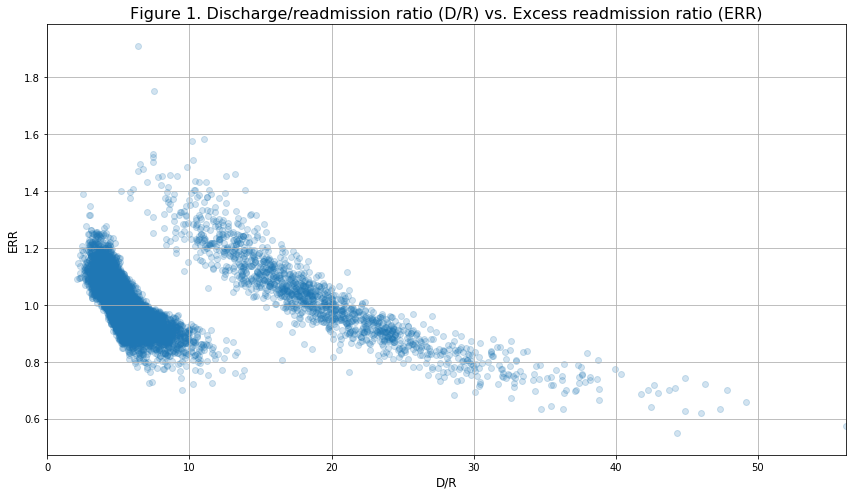

In [7]:
# Plot D/R vs. ERR
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x,y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('D/R', fontsize=12)
ax.set_ylabel('ERR', fontsize=12)

ax.set_title('Figure 1. Discharge/readmission ratio (D/R) vs. Excess readmission ratio (ERR)', fontsize=16)

ax.grid(True)
fig.tight_layout()

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for α= .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
5. Look at the scatterplot above.
    - What are the advantages and disadvantages of using this plot to convey information?
    - Construct another plot that conveys the same information in a more direct manner.



In [51]:
# ERR mean, Cluster 0
np.mean(new_tree_arr[:,1][np.where(new_tree_arr[:,56] == 0)])

1.004772500987752

In [52]:
# ERR mean, Cluster 1
np.mean(new_tree_arr[:,1][np.where(new_tree_arr[:,56] == 1)])

1.027998905109489

In [57]:
# Compare Cluster 0 to Cluster 1 ERR means
scipy.stats.ttest_ind(new_tree_arr[:,1][np.where(new_tree_arr[:,56] == 0)], 
                      new_tree_arr[:,1][np.where(new_tree_arr[:,56] == 1)])

Ttest_indResult(statistic=-8.807536413731802, pvalue=1.4622092535107237e-18)

In [54]:
# Pearson correlation coefficient for D/R on ERR, Cluster 0
pearsonr(new_tree_arr[:,0][np.where(new_tree_arr[:,56] == 0)], new_tree_arr[:,1][np.where(new_tree_arr[:,56] == 0)])
# (Outputs Pearson’s correlation coefficient, and 2-tailed p-value)

(-0.7447184206978761, 0.0)

In [55]:
# Pearson correlation coefficient for D/R on ERR, Cluster 1
pearsonr(new_tree_arr[:,0][np.where(new_tree_arr[:,56] == 1)], new_tree_arr[:,1][np.where(new_tree_arr[:,56] == 1)])
# (Outputs Pearson’s correlation coefficient, and 2-tailed p-value)

(-0.8979711613763103, 0.0)

In [ ]:
#

# See below for coding giving rise to the clusters, and further analysis to predict the clusters

#

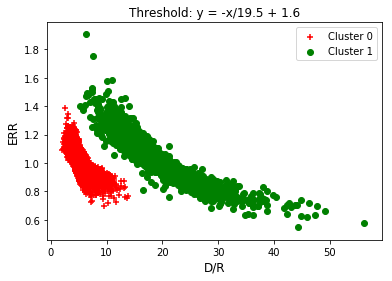

In [8]:
# Separate groups seen in Figure 1 using manually determined threshold line

for i in range(0, xy.shape[0]):
    if xy[i,1] <= -(1/19.5)*xy[i,0] + 1.6:
        c1 = plt.scatter(xy[i,0],xy[i,1],c='r',
                         marker='+')
    elif xy[i,1] > -(1/19.5)*xy[i,0] + 1.6:
        c2 = plt.scatter(xy[i,0],xy[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 0', 
            'Cluster 1'])
plt.xlabel('D/R', fontsize=12)
plt.ylabel('ERR', fontsize=12)
plt.title('Threshold: y = -x/19.5 + 1.6')
plt.show()

In [9]:
# The manual approach above works well, but a machine-
#  learning approach is desired.

# Separate groups seen in Figure 1 using DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

ss = StandardScaler()
xy_t = ss.fit_transform(xy)
#xy_t_small = xy_t[::10]
                
db = DBSCAN(eps=0.5, min_samples=10, algorithm='kd_tree')
labels = db.fit_predict(xy_t)

In [10]:
# View the DBSCAN output labels (-1 is noise)
set(labels)

{-1, 0, 1}

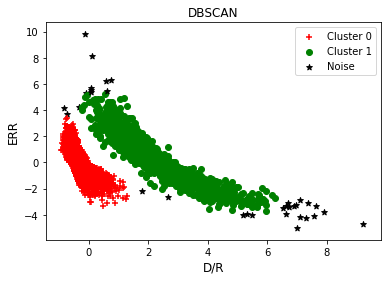

In [126]:
# Plot DBSCAN results
import matplotlib.pyplot as plt

for i in range(0, xy_t.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(xy_t[i,0],xy_t[i,1],c='r',
                         marker='+')
    elif db.labels_[i] == 1:
        c2 = plt.scatter(xy_t[i,0],xy_t[i,1],c='g',
                         marker='o')
    elif db.labels_[i] == -1:
        c4 = plt.scatter(xy_t[i,0],xy_t[i,1],c='k',
                         marker='*')
plt.legend([c1, 
            c2, 
            c4], 
           ['Cluster 0', 
            'Cluster 1', 
            'Noise'])
plt.xlabel('D/R', fontsize=12)
plt.ylabel('ERR', fontsize=12)
plt.title('DBSCAN')
plt.show()

In [11]:
# Run support vector machine (SVM) using 
#  non-noise labels output from DBSCAN above

# Create noise and non-noise datasets
xyl = np.column_stack((x,y,labels))
xyl_noise = xyl[np.where(xyl[:,2] == -1)]
xyl_nonoise = xyl[np.where(xyl[:,2] != -1)]

In [12]:
xyl_nonoise.shape

(11461, 3)

In [13]:
# Run support vector machine (SVM) using 
#  non-noise labels output from DBSCAN above

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(xyl_nonoise[:,0:2], xyl_nonoise[:,2])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [14]:
# SVM: Predict on the non-noise set, measure accuracy,
#  and plot
labels_pred = lin_clf.predict(xyl_nonoise[:,0:2])
accuracy_score(xyl_nonoise[:,2], labels_pred)

1.0

In [15]:
labels_pred.shape

(11461,)

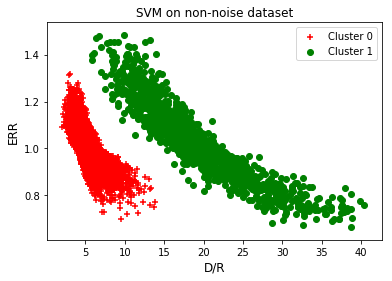

In [127]:
for i in range(0, xyl_nonoise.shape[0]):
    if labels_pred[i] == 0:
        c1 = plt.scatter(xyl_nonoise[i,0],xyl_nonoise[i,1],c='r',
                         marker='+')
    elif labels_pred[i] == 1:
        c2 = plt.scatter(xyl_nonoise[i,0],xyl_nonoise[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 0', 
            'Cluster 1'])
plt.xlabel('D/R', fontsize=12)
plt.ylabel('ERR', fontsize=12)
plt.title('SVM on non-noise dataset')
plt.show()

In [16]:
# SVM: predict on the full (noise & no-noise) set and plot 
full_labels_pred = lin_clf.predict(xyl[:,0:2])

In [17]:
set(full_labels_pred)

{0.0, 1.0}

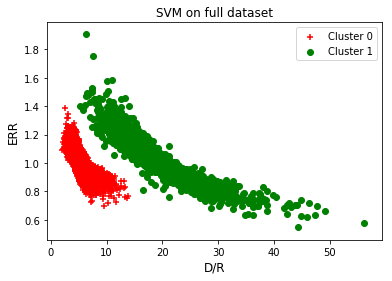

In [128]:
for i in range(0, xyl.shape[0]):
    if full_labels_pred[i] == 0:
        c1 = plt.scatter(xyl[i,0],xyl[i,1],c='r',
                         marker='+')
    elif full_labels_pred[i] == 1:
        c2 = plt.scatter(xyl[i,0],xyl[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 0', 
            'Cluster 1'])
plt.xlabel('D/R', fontsize=12)
plt.ylabel('ERR', fontsize=12)
plt.title('SVM on full dataset')
plt.show()

In [58]:
# This (UN) semi-supervised approach works as well as the 
#  manual approach, so now we'll take this SVM model 
#  and go into a decision tree 
#  (There is no need at this point to specify a more 
#   complex SVM kernel, or tuning SVM parameters)

# Add full labels from SVM to dataset
xylf = np.column_stack((xyl, full_labels_pred))

# Decision tree
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(xylf[:,0:2], xylf[:,3])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
# Tree: predict on the full set, measure accuracy, and plot
tree_labels_pred = tree_clf.predict(xylf[:,0:2])
accuracy_score(xylf[:,3], tree_labels_pred)

1.0

In [60]:
set(tree_labels_pred)

{0.0, 1.0}

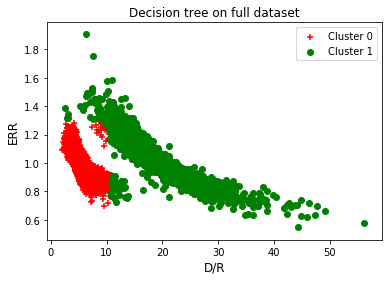

In [129]:
for i in range(0, xylf.shape[0]):
    if tree_labels_pred[i] == 0:
        c1 = plt.scatter(xylf[i,0],xylf[i,1],c='r',
                         marker='+')
    elif tree_labels_pred[i] == 1:
        c2 = plt.scatter(xylf[i,0],xylf[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 0', 
            'Cluster 1'])
plt.xlabel('D/R', fontsize=12)
plt.ylabel('ERR', fontsize=12)
plt.title('Decision tree on full dataset')
plt.show()

In [134]:
# This outputs .dot file which can be plotted on www.webgraphiz.com
export_graphviz(tree_clf, out_file="tree1.dot", class_names=["Cluster 0", "Cluster 1"])

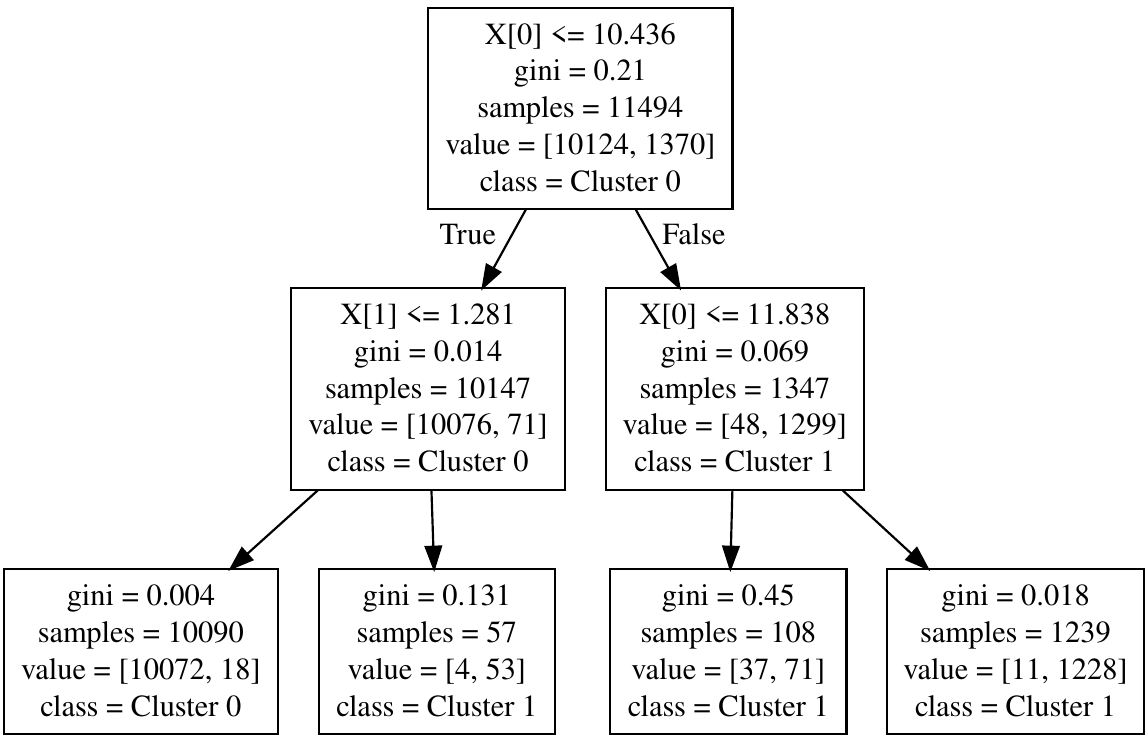

In [64]:
# Set up dummy variables for select Hospital Name words
#
# Bring lowercase Hospital Name string into new variable and clean it

clean_82["hospital name"] = [x.replace('-',' ') for x in clean_82["Hospital Name"].str.lower()]
clean_82["hospital name"] = [x.replace(' & ',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace(' and ',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('the ',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace(' at ',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace(' of ',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace(',',' ') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('saint','st') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('ctr','center') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace("'",'') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('marys','mary') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('lukes','luke') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('josephs','joseph') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('johns','john') for x in clean_82["hospital name"]]
clean_82["hospital name"] = [x.replace('vincents','vincent') for x in clean_82["hospital name"]]

In [80]:
# Count each word and obtain dummy variable (one-hot encoding)
#  for the 50 most frequent words, and view them
h_str_50 = pd.Series(' '.join(clean_82["hospital name"]).lower().split()).value_counts()[:50].index.values
h_str_50

array(['hospital', 'center', 'medical', 'regional', 'st', 'memorial',
       'health', 'community', 'university', 'inc', 'general', 'mercy',
       'valley', 'county', 'mary', 'joseph', 'system', 'baptist', 'north',
       'west', 'methodist', 'healthcare', 'south', 'luke', 'texas',
       'john', 'east', 'francis', 'providence', 'hospitals', 'campus',
       'samaritan', 'good', 'heart', 'city', 'vincent', 'presbyterian',
       'clinic', 'san', 'lake', 'florida', 'central', 'park', 'med',
       'river', 'doctors', 'southern', 'franciscan', 'elizabeth',
       'northwest'], dtype=object)

In [66]:
clean_82.to_csv('data/clean_82.csv')

In [ ]:
# Break

In [67]:
clean_82=pd.read_csv('data/clean_82.csv')
clean_82.shape

(11494, 14)

In [68]:
# Create new variables for each of the top 50 words
for k in range(h_str_50.shape[0]):
    clean_82[h_str_50[k]] = clean_82.apply(lambda _: 0, axis=1)

In [69]:
clean_82.shape

(11494, 64)

In [70]:
# Specify new variables as dummy variables for presence
#  of its given word

line=0
for i in range(clean_82.shape[0]):
    line+=1
    col=13
    for j in range(h_str_50.shape[0]):
        col+=1
        if h_str_50[j] in clean_82.iloc[i,13]:
            clean_82.iloc[i,col] = 1
        print(line, end='\r')

In [175]:
# Check dummies created appropriately
pd.options.display.max_columns = 100
clean_82.head(50)

,Unnamed: 0,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,hospital name,hospital,center,medical,regional,st,memorial,health,community,university,inc,general,mercy,valley,county,mary,joseph,system,baptist,north,west,methodist,healthcare,ctr,south,luke,john,texas,east,francis,providence,hospitals,campus,samaritan,good,heart,city,vincent,presbyterian,clinic,san,florida,lake,central,park,med,river,doctors,southern,franciscan,elizabeth
0,1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013,university md charles regional medical center,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013,atlantic general hospital,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013,mercy medical center inc,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013,kaiser foundation hospital santa clara,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013,palmerton hospital,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013,tennova healthcare jefferson memorial hospital,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013,fort madison community hospital,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013,island hospital,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013,north central bronx hospital,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013,kaiser foundation hospital fontana,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
clean_82.to_csv('data/clean_82dummy.csv')

In [ ]:
# Break

In [72]:
clean_82dummy=pd.read_csv('data/clean_82dummy.csv')
clean_82dummy.shape

(11494, 65)

In [73]:
# Load in states data
#  (source: https://inkplant.com/code/us-state-mysql-table)

states_df = pd.read_csv('data/states_data.csv')

In [74]:
states_df.head()

,name,abv,country,is_state,is_lower48,slug,latitude,longitude,population,area
0,Alabama,AL,US,y,y,alabama,32.806671,-86.791130,4779736,50744.00
1,Alaska,AK,US,y,n,alaska,61.370716,-152.404419,710231,571951.25
2,Arizona,AZ,US,y,y,arizona,33.729759,-111.431221,6392017,113634.57
3,Arkansas,AR,US,y,y,arkansas,34.969704,-92.373123,2915918,52068.17
4,California,CA,US,y,y,california,36.116203,-119.681564,37253956,155939.52


In [75]:
# Convert xylf array to dataframe, naming variables,
#  then concatenate to clean_82 state and dummy columns,
#  then left merge to states_df along State/Abv value 

xyf_df = pd.DataFrame({'D/R':xylf[:,0],'ERR':xylf[:,1],'SVM_label':xylf[:,3]})

dum_xyf = pd.concat([clean_82dummy, xyf_df], axis=1)

dum_xyf_st = pd.merge(dum_xyf, states_df[['name','abv','latitude','longitude','population','area']], 
                      how='left', left_on='State', right_on='abv')
dum_xyf_st.head()

,Unnamed: 0,Unnamed: 0.1,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,...,northwest,D/R,ERR,SVM_label,name,abv,latitude,longitude,population,area
0,0,1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,...,0,2.083333,1.0914,0.0,Maryland,MD,39.063946,-76.802101,5773552,9773.82
1,1,1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,...,0,2.250000,1.0961,0.0,Maryland,MD,39.063946,-76.802101,5773552,9773.82
2,2,1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,...,0,2.333333,1.0934,0.0,Maryland,MD,39.063946,-76.802101,5773552,9773.82
3,3,1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,...,0,2.636364,1.0908,0.0,California,CA,36.116203,-119.681564,37253956,155939.52
4,4,1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,...,0,2.307692,1.1123,0.0,Pennsylvania,PA,40.590752,-77.209755,12702379,44816.61


In [76]:
dum_xyf_st.to_csv('data/dum_xyf_st.csv')

In [77]:
del xyf_df
del dum_xyf

In [ ]:
# Break

In [78]:
dum_xyf_st=pd.read_csv('data/dum_xyf_st.csv')
dum_xyf_st.shape

(11494, 75)

In [81]:
dum_xyf_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11494 entries, 0 to 11493
Data columns (total 75 columns):
Unnamed: 0                    11494 non-null int64
Unnamed: 0.1                  11494 non-null int64
Unnamed: 0.1.1                11494 non-null int64
Hospital Name                 11494 non-null object
Provider Number               11494 non-null int64
State                         11494 non-null object
Measure Name                  11494 non-null object
Number of Discharges          11494 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11494 non-null float64
Predicted Readmission Rate    11494 non-null float64
Expected Readmission Rate     11494 non-null float64
Number of Readmissions        11494 non-null float64
Start Date                    11494 non-null object
End Date                      11494 non-null object
hospital name                 11494 non-null object
hospital                      11494 non-null int64
center      

In [82]:
new_tree_df = dum_xyf_st[['Provider Number',
                           'State',
                           'name',                  
                           'D/R',         
                           'ERR',
                           'latitude',    
                           'longitude',   
                           'population',  
                           'area',
                           'hospital',
                           'center',  
                           'medical', 
                           'regional',
                           'st',      
                           'memorial',
                           'health',  
                           'community',
                           'university', 
                           'inc',        
                           'general',    
                           'mercy',      
                           'valley',     
                           'county',     
                           'mary',       
                           'joseph',     
                           'system',     
                           'baptist',    
                           'north',      
                           'west',       
                           'methodist',  
                           'healthcare', 
                           'south',      
                           'luke',       
                           'john',       
                           'texas',      
                           'east',       
                           'francis',    
                           'providence', 
                           'hospitals',  
                           'campus',     
                           'samaritan',  
                           'good',       
                           'heart',      
                           'city',        
                           'vincent',     
                           'presbyterian',
                           'clinic',      
                           'san',         
                           'florida',     
                           'lake',        
                           'central',     
                           'park',        
                           'med',         
                           'river',       
                           'doctors',     
                           'southern',    
                           'franciscan',  
                           'elizabeth',
                           'northwest']]
new_tree_df["target"]=dum_xyf_st[['SVM_label']]

In [83]:
new_tree_df.head()

,Provider Number,State,name,D/R,ERR,latitude,longitude,population,area,hospital,...,central,park,med,river,doctors,southern,franciscan,elizabeth,northwest,target
0,210035,MD,Maryland,2.083333,1.0914,39.063946,-76.802101,5773552,9773.82,0,...,0,0,1,0,0,0,0,0,0,0.0
1,210061,MD,Maryland,2.250000,1.0961,39.063946,-76.802101,5773552,9773.82,1,...,0,0,0,0,0,0,0,0,0,0.0
2,210008,MD,Maryland,2.333333,1.0934,39.063946,-76.802101,5773552,9773.82,0,...,0,0,1,0,0,0,0,0,0,0.0
3,50071,CA,California,2.636364,1.0908,36.116203,-119.681564,37253956,155939.52,1,...,0,0,0,0,0,0,0,0,0,0.0
4,390019,PA,Pennsylvania,2.307692,1.1123,40.590752,-77.209755,12702379,44816.61,1,...,0,0,0,0,0,0,0,0,0,0.0


In [84]:
new_tree_arr = new_tree_df.iloc[:,3:].values

In [85]:
new_tree_arr.shape

(11494, 57)

In [61]:
# New Tree: Perform decision tree again, now on expanded set of features
#
#  NOTE you need to remove ERR from tree, here and below in states tree
#
new_tree_clf = DecisionTreeClassifier(max_depth=30)
new_tree_clf.fit(new_tree_arr[:,2:56], new_tree_arr[:,56])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
# New Tree: Predict on the full set, measure accuracy, and plot
new_tree_labels_pred = new_tree_clf.predict(new_tree_arr[:,2:56])
accuracy_score(new_tree_arr[:,56], new_tree_labels_pred)

0.8834174351835741

In [63]:
unique, counts = np.unique(new_tree_labels_pred, return_counts=True)
dict(zip(unique, counts))

{0.0: 11464, 1.0: 30}

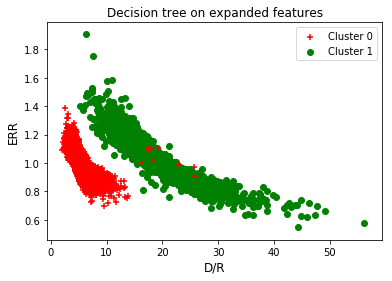

In [123]:
for i in range(0, new_tree_arr.shape[0]):
    if new_tree_labels_pred[i] == 0:
        c1 = plt.scatter(new_tree_arr[i,0],new_tree_arr[i,1],c='r',
                         marker='+')
    elif new_tree_labels_pred[i] == 1:
        c2 = plt.scatter(new_tree_arr[i,0],new_tree_arr[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 0', 
            'Cluster 1'])
plt.xlabel('D/R', fontsize=12)
plt.ylabel('ERR', fontsize=12)
plt.title('Decision tree on expanded features')
plt.show()

In [136]:
# Output .dot file which can be plotted on www.webgraphiz.com
export_graphviz(new_tree_clf, out_file="tree2.dot", 
                feature_names=['ERR',
                               'latitude',    
                               'longitude',   
                               'population',  
                               'area',
                               'hospital',
                               'center',  
                               'medical', 
                               'regional',
                               'st',      
                               'memorial',
                               'health',  
                               'community',
                               'university', 
                               'inc',        
                               'general',    
                               'mercy',      
                               'valley',     
                               'county',     
                               'mary',       
                               'joseph',     
                               'system',     
                               'baptist',    
                               'north',      
                               'west',       
                               'methodist',  
                               'healthcare', 
                               'ctr',        
                               'south',      
                               'luke',       
                               'john',       
                               'texas',      
                               'east',       
                               'francis',    
                               'providence', 
                               'hospitals',  
                               'campus',     
                               'samaritan',  
                               'good',       
                               'heart',      
                               'city',        
                               'vincent',     
                               'presbyterian',
                               'clinic',      
                               'san',         
                               'florida',     
                               'lake',        
                               'central',     
                               'park',        
                               'med',         
                               'river',       
                               'doctors',     
                               'southern',    
                               'franciscan',  
                               'elizabeth'],
                class_names=["Cluster 0", "Cluster 1"])

In [31]:
# This tree is too complex to plot, so we'll go straight to 
#  viewing feature importance
features =                    ['ERR',
                               'latitude',    
                               'longitude',   
                               'population',  
                               'area',
                               'hospital',
                               'center',  
                               'medical', 
                               'regional',
                               'st',      
                               'memorial',
                               'health',  
                               'community',
                               'university', 
                               'inc',        
                               'general',    
                               'mercy',      
                               'valley',     
                               'county',     
                               'mary',       
                               'joseph',     
                               'system',     
                               'baptist',    
                               'north',      
                               'west',       
                               'methodist',  
                               'healthcare', 
                               'ctr',        
                               'south',      
                               'luke',       
                               'john',       
                               'texas',      
                               'east',       
                               'francis',    
                               'providence', 
                               'hospitals',  
                               'campus',     
                               'samaritan',  
                               'good',       
                               'heart',      
                               'city',        
                               'vincent',     
                               'presbyterian',
                               'clinic',      
                               'san',         
                               'florida',     
                               'lake',        
                               'central',     
                               'park',        
                               'med',         
                               'river',       
                               'doctors',     
                               'southern',    
                               'franciscan',  
                               'elizabeth']
for feature, score in sorted(zip(features, new_tree_clf.feature_importances_), key = lambda x:x[1], reverse=True):
    print('{:12}'.format(feature), round(score, 4))

ERR          0.5712
population   0.052
area         0.0515
latitude     0.0435
longitude    0.0344
st           0.0174
hospital     0.0159
health       0.0153
regional     0.0138
center       0.0128
medical      0.0118
memorial     0.0108
med          0.0105
inc          0.0063
joseph       0.0061
general      0.0059
san          0.0058
community    0.0058
university   0.0055
mary         0.0053
north        0.005
valley       0.005
lake         0.0049
mercy        0.0048
east         0.0045
south        0.0045
clinic       0.0042
vincent      0.004
system       0.0038
park         0.0035
river        0.0034
hospitals    0.0034
methodist    0.0033
good         0.0033
baptist      0.003
providence   0.003
francis      0.0029
west         0.0027
samaritan    0.0027
john         0.0025
luke         0.0025
city         0.0023
ctr          0.0022
elizabeth    0.0021
central      0.002
campus       0.0019
florida      0.0019
healthcare   0.0019
presbyterian 0.0018
county       0.0014
souther

In [ ]:
# Interestingly, state-level features (area, latitude, longitude, 
#  population) are most predictive of clusters

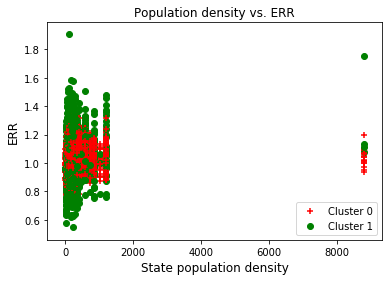

In [156]:
# We take a look at population density (population/area)
#  plotted against ERR, color coded for clusters
#  (note the outlier for DC)

for i in range(0, new_tree_arr.shape[0]):
    if new_tree_labels_pred[i] == 0:
        c1 = plt.scatter(new_tree_arr[i,4]/new_tree_arr[i,5],new_tree_arr[i,1],c='r',
                         marker='+')
    elif new_tree_labels_pred[i] == 1:
        c2 = plt.scatter(new_tree_arr[i,4]/new_tree_arr[i,5],new_tree_arr[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 0', 
            'Cluster 1'])
plt.xlabel('State population density', fontsize=12)
plt.ylabel('ERR', fontsize=12)
plt.title('Population density vs. ERR')
plt.show()

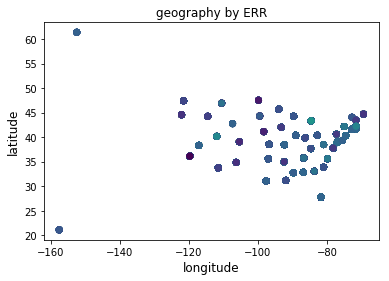

In [181]:
# Plot longitude by latitude, coloring by ERR
plt.scatter(new_tree_df['longitude'].values,new_tree_df['latitude'].values,c=new_tree_df['ERR'].values)
plt.xlabel('longitude', fontsize=12)
plt.ylabel('latitude', fontsize=12)
plt.title('geography by ERR')
plt.show()

The plots do not clearly show population density or geography to be correlated with ERR. We hypothesize that it is the state identity itself that is predictive of ERR. 

We will create dummy variables for each state.

In [34]:
state_dum = pd.get_dummies(new_tree_df['State'], prefix='sdum_')

In [35]:
state_dum.head()

,sdum__AK,sdum__AL,sdum__AR,sdum__AZ,sdum__CA,sdum__CO,sdum__CT,sdum__DC,sdum__DE,sdum__FL,...,sdum__SD,sdum__TN,sdum__TX,sdum__UT,sdum__VA,sdum__VT,sdum__WA,sdum__WI,sdum__WV,sdum__WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
state_dum_arr = state_dum.values

In [37]:
state_dum_arr = np.column_stack((state_dum_arr,new_tree_arr[:,1]))

In [38]:
state_dum_arr.shape

(11494, 52)

In [39]:
state_tree_clf = DecisionTreeClassifier(max_depth=20)
state_tree_clf.fit(state_dum_arr[:,:], new_tree_arr[:,56])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
state_tree_labels_pred = state_tree_clf.predict(state_dum_arr[:,:])
accuracy_score(new_tree_arr[:,56], state_tree_labels_pred)

0.9459718113798503

In [41]:
unique, counts = np.unique(state_tree_labels_pred, return_counts=True)
dict(zip(unique, counts))

{0.0: 10719, 1.0: 775}

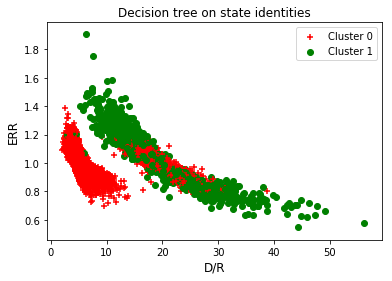

In [218]:
for i in range(0, new_tree_arr.shape[0]):
    if state_tree_labels_pred[i] == 0:
        c1 = plt.scatter(new_tree_arr[i,0],new_tree_arr[i,1],c='r',
                         marker='+')
    elif state_tree_labels_pred[i] == 1:
        c2 = plt.scatter(new_tree_arr[i,0],new_tree_arr[i,1],c='g',
                         marker='o')
plt.legend([c1, 
            c2], 
           ['Cluster 0', 
            'Cluster 1'])
plt.xlabel('D/R', fontsize=12)
plt.ylabel('ERR', fontsize=12)
plt.title('Decision tree on state identities')
plt.show()